In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the csv file into a Pandas DataFrame
df = pd.read_csv('singlephase/2nd_setup_17_peaks_20k.csv')

In [3]:
df

,test_id,gas,oil,water,Peak 1,Peak 2,Peak 3,Peak 4,Peak 5,Peak 6,...,Peak 59,Peak 60,Peak 61,Peak 62,Peak 63,Peak 64,Peak 65,Peak 66,Peak 67,Peak 68
0,G_01,44.229995,0.000000,0.000000,500.207280,1000.417863,7.214338,1347.697044,2276.979029,6250.080517,...,4951.222292,6250.080517,5749.311682,1000.417863,8750.112724,7451.254499,11250.144930,19426.856560,17202.069170,13750.177140
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,G_03,122.702951,0.000000,0.000000,13592.905240,2293.627500,1542.203379,501.330391,7.141666,4683.951567,...,5739.996466,501.330391,14037.392990,15858.454960,5114.601931,14511.841390,4684.149764,8012.182453,10341.818880,16395.034530
3,G_04,163.526940,0.000000,0.000000,5621.960787,500.554123,6394.122825,7.158182,10429.196930,6058.223403,...,13917.860940,13467.245620,6129.792010,14838.841810,3899.498068,500.554123,5273.036579,19382.837210,15205.848110,10998.551520
4,G_05,184.486018,0.000000,0.000000,6756.167614,13504.869840,500.897663,3707.812725,10401.608030,4923.028899,...,7393.027792,14836.450240,14454.258820,16513.354290,15907.392880,12714.252450,4556.194371,500.897663,8389.303357,10420.552270
5,G_08,19.747936,0.000000,0.000000,500.385656,1000.777920,6972.795936,7.498419,2274.914487,3412.272632,...,5743.177513,6250.080517,4948.173375,13888.987070,17195.261130,19438.084370,8750.109421,11250.141630,18315.875010,7448.205582
6,O_01,0.000000,9.990591,0.010954,455.177129,910.354259,0.023123,2278.947777,3418.003802,5697.407430,...,9153.824937,7177.317779,8740.556369,11132.578320,15238.718930,13123.758590,3087.584502,1342.768568,18865.882360,4427.079531
7,O_02,0.000000,19.963979,0.034324,455.154007,910.301407,0.016516,2281.355859,3421.957814,15836.590630,...,2765.585232,18303.322590,7596.601598,7260.058038,9151.958590,2342.694245,6685.837734,11035.482050,6280.728238,12858.813370
8,O_03,0.000000,29.925927,0.074261,455.117671,910.238645,0.006607,2276.318376,3414.869001,5229.198908,...,4563.481380,2343.622463,17373.052930,7599.092262,16347.837430,3888.778963,18304.908160,3280.696857,9152.665490,10868.227680
9,O_04,0.000000,39.876522,0.122652,455.068122,910.139547,7.035961,2276.156515,1728.752141,4443.955928,...,9700.050045,1562.693551,3427.127429,10868.795840,10499.355040,19256.146970,5811.307417,3093.566720,16494.512450,3969.088017


In [4]:
df = df.drop(columns=['test_id'])

In [5]:
df

,gas,oil,water,Peak 1,Peak 2,Peak 3,Peak 4,Peak 5,Peak 6,Peak 7,...,Peak 59,Peak 60,Peak 61,Peak 62,Peak 63,Peak 64,Peak 65,Peak 66,Peak 67,Peak 68
0,44.229995,0.000000,0.000000,500.207280,1000.417863,7.214338,1347.697044,2276.979029,6250.080517,8750.112724,...,4951.222292,6250.080517,5749.311682,1000.417863,8750.112724,7451.254499,11250.144930,19426.856560,17202.069170,13750.177140
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122.702951,0.000000,0.000000,13592.905240,2293.627500,1542.203379,501.330391,7.141666,4683.951567,6976.218121,...,5739.996466,501.330391,14037.392990,15858.454960,5114.601931,14511.841390,4684.149764,8012.182453,10341.818880,16395.034530
3,163.526940,0.000000,0.000000,5621.960787,500.554123,6394.122825,7.158182,10429.196930,6058.223403,8388.893752,...,13917.860940,13467.245620,6129.792010,14838.841810,3899.498068,500.554123,5273.036579,19382.837210,15205.848110,10998.551520
4,184.486018,0.000000,0.000000,6756.167614,13504.869840,500.897663,3707.812725,10401.608030,4923.028899,8301.988072,...,7393.027792,14836.450240,14454.258820,16513.354290,15907.392880,12714.252450,4556.194371,500.897663,8389.303357,10420.552270
5,19.747936,0.000000,0.000000,500.385656,1000.777920,6972.795936,7.498419,2274.914487,3412.272632,1353.798180,...,5743.177513,6250.080517,4948.173375,13888.987070,17195.261130,19438.084370,8750.109421,11250.141630,18315.875010,7448.205582
6,0.000000,9.990591,0.010954,455.177129,910.354259,0.023123,2278.947777,3418.003802,5697.407430,7975.853110,...,9153.824937,7177.317779,8740.556369,11132.578320,15238.718930,13123.758590,3087.584502,1342.768568,18865.882360,4427.079531
7,0.000000,19.963979,0.034324,455.154007,910.301407,0.016516,2281.355859,3421.957814,15836.590630,5702.577045,...,2765.585232,18303.322590,7596.601598,7260.058038,9151.958590,2342.694245,6685.837734,11035.482050,6280.728238,12858.813370
8,0.000000,29.925927,0.074261,455.117671,910.238645,0.006607,2276.318376,3414.869001,5229.198908,5690.837230,...,4563.481380,2343.622463,17373.052930,7599.092262,16347.837430,3888.778963,18304.908160,3280.696857,9152.665490,10868.227680
9,0.000000,39.876522,0.122652,455.068122,910.139547,7.035961,2276.156515,1728.752141,4443.955928,3403.168825,...,9700.050045,1562.693551,3427.127429,10868.795840,10499.355040,19256.146970,5811.307417,3093.566720,16494.512450,3969.088017


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 71 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gas      27 non-null     float64
 1   oil      27 non-null     float64
 2   water    27 non-null     float64
 3   Peak 1   27 non-null     float64
 4   Peak 2   27 non-null     float64
 5   Peak 3   27 non-null     float64
 6   Peak 4   27 non-null     float64
 7   Peak 5   27 non-null     float64
 8   Peak 6   27 non-null     float64
 9   Peak 7   27 non-null     float64
 10  Peak 8   27 non-null     float64
 11  Peak 9   27 non-null     float64
 12  Peak 10  27 non-null     float64
 13  Peak 11  27 non-null     float64
 14  Peak 12  27 non-null     float64
 15  Peak 13  27 non-null     float64
 16  Peak 14  27 non-null     float64
 17  Peak 15  27 non-null     float64
 18  Peak 16  27 non-null     float64
 19  Peak 17  27 non-null     float64
 20  Peak 18  27 non-null     float64
 21  Peak 19  27 non-nu

In [8]:
df

,gas,oil,water,Peak 1,Peak 2,Peak 3,Peak 4,Peak 5,Peak 6,Peak 7,...,Peak 59,Peak 60,Peak 61,Peak 62,Peak 63,Peak 64,Peak 65,Peak 66,Peak 67,Peak 68
0,44.229995,0.000000,0.000000,500.207280,1000.417863,7.214338,1347.697044,2276.979029,6250.080517,8750.112724,...,4951.222292,6250.080517,5749.311682,1000.417863,8750.112724,7451.254499,11250.144930,19426.856560,17202.069170,13750.177140
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122.702951,0.000000,0.000000,13592.905240,2293.627500,1542.203379,501.330391,7.141666,4683.951567,6976.218121,...,5739.996466,501.330391,14037.392990,15858.454960,5114.601931,14511.841390,4684.149764,8012.182453,10341.818880,16395.034530
3,163.526940,0.000000,0.000000,5621.960787,500.554123,6394.122825,7.158182,10429.196930,6058.223403,8388.893752,...,13917.860940,13467.245620,6129.792010,14838.841810,3899.498068,500.554123,5273.036579,19382.837210,15205.848110,10998.551520
4,184.486018,0.000000,0.000000,6756.167614,13504.869840,500.897663,3707.812725,10401.608030,4923.028899,8301.988072,...,7393.027792,14836.450240,14454.258820,16513.354290,15907.392880,12714.252450,4556.194371,500.897663,8389.303357,10420.552270
5,19.747936,0.000000,0.000000,500.385656,1000.777920,6972.795936,7.498419,2274.914487,3412.272632,1353.798180,...,5743.177513,6250.080517,4948.173375,13888.987070,17195.261130,19438.084370,8750.109421,11250.141630,18315.875010,7448.205582
6,0.000000,9.990591,0.010954,455.177129,910.354259,0.023123,2278.947777,3418.003802,5697.407430,7975.853110,...,9153.824937,7177.317779,8740.556369,11132.578320,15238.718930,13123.758590,3087.584502,1342.768568,18865.882360,4427.079531
7,0.000000,19.963979,0.034324,455.154007,910.301407,0.016516,2281.355859,3421.957814,15836.590630,5702.577045,...,2765.585232,18303.322590,7596.601598,7260.058038,9151.958590,2342.694245,6685.837734,11035.482050,6280.728238,12858.813370
8,0.000000,29.925927,0.074261,455.117671,910.238645,0.006607,2276.318376,3414.869001,5229.198908,5690.837230,...,4563.481380,2343.622463,17373.052930,7599.092262,16347.837430,3888.778963,18304.908160,3280.696857,9152.665490,10868.227680
9,0.000000,39.876522,0.122652,455.068122,910.139547,7.035961,2276.156515,1728.752141,4443.955928,3403.168825,...,9700.050045,1562.693551,3427.127429,10868.795840,10499.355040,19256.146970,5811.307417,3093.566720,16494.512450,3969.088017


In [9]:
df.isna().sum()

gas        3
oil        3
water      3
Peak 1     3
Peak 2     3
          ..
Peak 64    3
Peak 65    3
Peak 66    3
Peak 67    3
Peak 68    3
Length: 71, dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df

,gas,oil,water,Peak 1,Peak 2,Peak 3,Peak 4,Peak 5,Peak 6,Peak 7,...,Peak 59,Peak 60,Peak 61,Peak 62,Peak 63,Peak 64,Peak 65,Peak 66,Peak 67,Peak 68
0,44.229995,0.000000,0.000000,500.207280,1000.417863,7.214338,1347.697044,2276.979029,6250.080517,8750.112724,...,4951.222292,6250.080517,5749.311682,1000.417863,8750.112724,7451.254499,11250.144930,19426.856560,17202.069170,13750.177140
2,122.702951,0.000000,0.000000,13592.905240,2293.627500,1542.203379,501.330391,7.141666,4683.951567,6976.218121,...,5739.996466,501.330391,14037.392990,15858.454960,5114.601931,14511.841390,4684.149764,8012.182453,10341.818880,16395.034530
3,163.526940,0.000000,0.000000,5621.960787,500.554123,6394.122825,7.158182,10429.196930,6058.223403,8388.893752,...,13917.860940,13467.245620,6129.792010,14838.841810,3899.498068,500.554123,5273.036579,19382.837210,15205.848110,10998.551520
4,184.486018,0.000000,0.000000,6756.167614,13504.869840,500.897663,3707.812725,10401.608030,4923.028899,8301.988072,...,7393.027792,14836.450240,14454.258820,16513.354290,15907.392880,12714.252450,4556.194371,500.897663,8389.303357,10420.552270
5,19.747936,0.000000,0.000000,500.385656,1000.777920,6972.795936,7.498419,2274.914487,3412.272632,1353.798180,...,5743.177513,6250.080517,4948.173375,13888.987070,17195.261130,19438.084370,8750.109421,11250.141630,18315.875010,7448.205582
6,0.000000,9.990591,0.010954,455.177129,910.354259,0.023123,2278.947777,3418.003802,5697.407430,7975.853110,...,9153.824937,7177.317779,8740.556369,11132.578320,15238.718930,13123.758590,3087.584502,1342.768568,18865.882360,4427.079531
7,0.000000,19.963979,0.034324,455.154007,910.301407,0.016516,2281.355859,3421.957814,15836.590630,5702.577045,...,2765.585232,18303.322590,7596.601598,7260.058038,9151.958590,2342.694245,6685.837734,11035.482050,6280.728238,12858.813370
8,0.000000,29.925927,0.074261,455.117671,910.238645,0.006607,2276.318376,3414.869001,5229.198908,5690.837230,...,4563.481380,2343.622463,17373.052930,7599.092262,16347.837430,3888.778963,18304.908160,3280.696857,9152.665490,10868.227680
9,0.000000,39.876522,0.122652,455.068122,910.139547,7.035961,2276.156515,1728.752141,4443.955928,3403.168825,...,9700.050045,1562.693551,3427.127429,10868.795840,10499.355040,19256.146970,5811.307417,3093.566720,16494.512450,3969.088017
10,0.000000,49.706942,0.291781,455.008663,910.020629,7.026051,4635.059897,2277.567011,5235.693133,3415.955776,...,1582.655200,5826.789835,4280.140257,7298.408981,16501.908460,10887.310660,16124.721490,6572.311016,2335.760685,17998.176600


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
        66.5, 67.5, 68.5, 69.5, 70.5]),
 [Text(0.5, 0, 'gas'),
  Text(1.5, 0, 'oil'),
  Text(2.5, 0, 'water'),
  Text(3.5, 0, 'Peak 1'),
  Text(4.5, 0, 'Peak 2'),
  Text(5.5, 0, 'Peak 3'),
  Text(6.5, 0, 'Peak 4'),
  Text(7.5, 0, 'Peak 5'),
  Text(8.5, 0, 'Peak 6'),
  Text(9.5, 0, 'Peak 7'),
  Text(10.5, 0, 'Peak 8'),
  Text(11.5, 0, 'Peak 9'),
  Text(12.5, 0, 'Peak 10'),
  Text(13.5, 0, 'Peak 11'),
  Text(14.5, 0, 'Peak 12'),
  Text(15.5, 0, 'Peak 13'),
  Text(16.5, 0, 'Peak 14'),
  Text(17.5, 0, 'Peak 15'),
  Text(18.5, 0, 'Peak 16'),
  Text(19.5, 

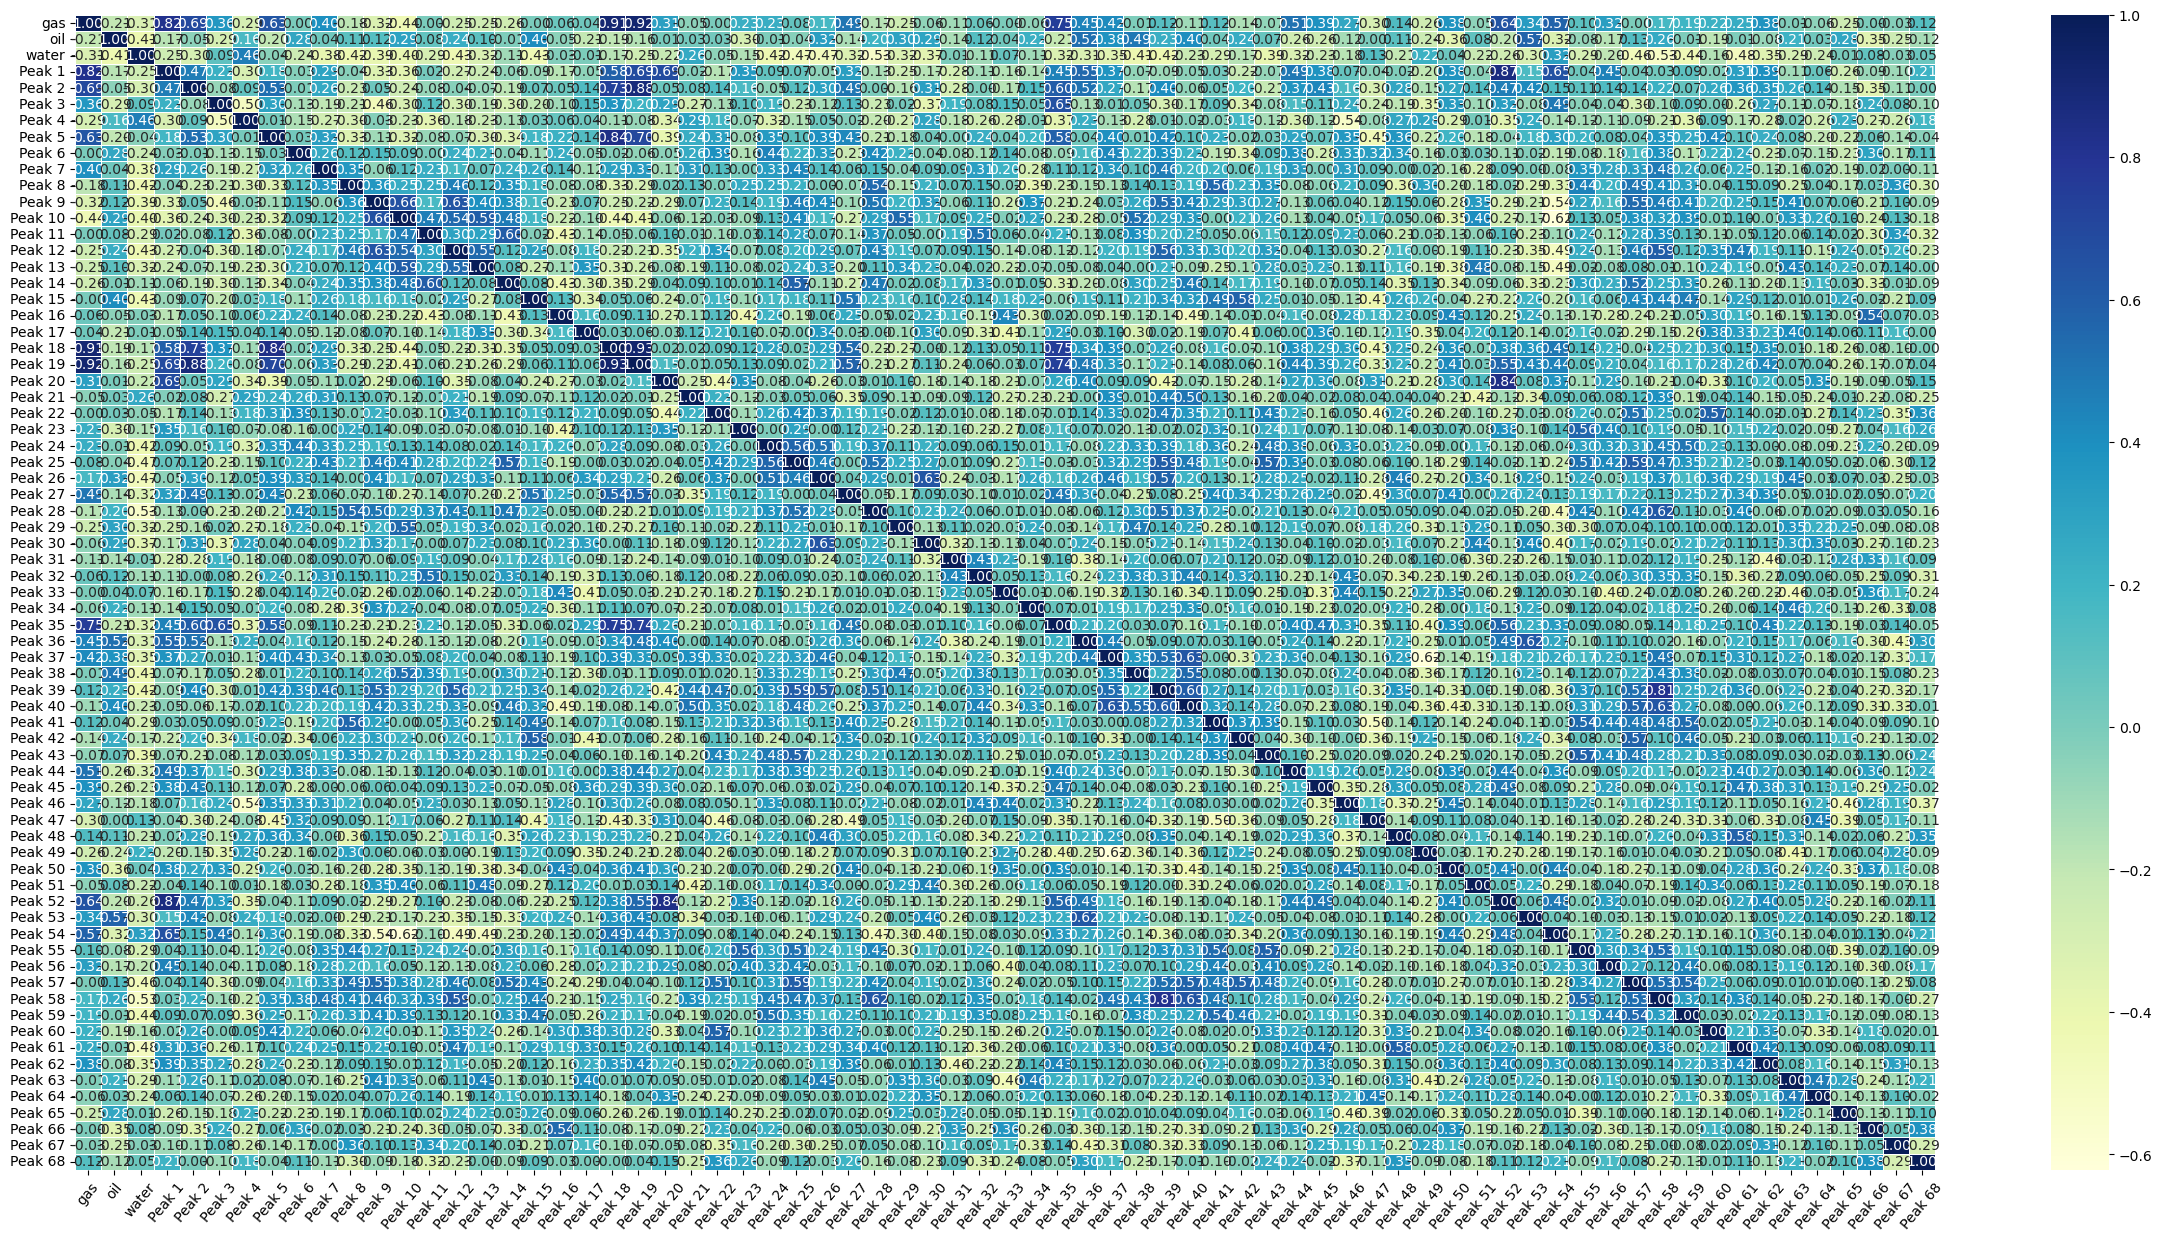

In [12]:
# Correlation matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
plt.xticks(rotation = 50)

In [16]:
df.columns

Index(['gas', 'oil', 'water', 'Peak 1', 'Peak 2', 'Peak 3', 'Peak 4', 'Peak 5',
       'Peak 6', 'Peak 7', 'Peak 8', 'Peak 9', 'Peak 10', 'Peak 11', 'Peak 12',
       'Peak 13', 'Peak 14', 'Peak 15', 'Peak 16', 'Peak 17', 'Peak 18',
       'Peak 19', 'Peak 20', 'Peak 21', 'Peak 22', 'Peak 23', 'Peak 24',
       'Peak 25', 'Peak 26', 'Peak 27', 'Peak 28', 'Peak 29', 'Peak 30',
       'Peak 31', 'Peak 32', 'Peak 33', 'Peak 34', 'Peak 35', 'Peak 36',
       'Peak 37', 'Peak 38', 'Peak 39', 'Peak 40', 'Peak 41', 'Peak 42',
       'Peak 43', 'Peak 44', 'Peak 45', 'Peak 46', 'Peak 47', 'Peak 48',
       'Peak 49', 'Peak 50', 'Peak 51', 'Peak 52', 'Peak 53', 'Peak 54',
       'Peak 55', 'Peak 56', 'Peak 57', 'Peak 58', 'Peak 59', 'Peak 60',
       'Peak 61', 'Peak 62', 'Peak 63', 'Peak 64', 'Peak 65', 'Peak 66',
       'Peak 67', 'Peak 68'],
      dtype='object')

In [18]:
# Split the data into train, validation and test
train, test = train_test_split(df, test_size=0.1, random_state = 1)
train, val = train_test_split(train, test_size=0.05, random_state = 1)

In [19]:
# Helper functions
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def format_output(data):
    y1 = data.pop('gas')
    y1 = np.array(y1)
    y2 = data.pop('oil')
    y2 = np.array(y2)
    y3 = data.pop('water')
    y3 = np.array(y3)
    return y1, y2, y3

In [20]:
train_stats = train.describe()
train_stats.pop('gas')
train_stats.pop('oil')
train_stats.pop('water')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)
val_Y = format_output(val)

print(train_stats)

         count          mean          std          min          25%  \
Peak 1    22.0    993.210433  1691.243849   443.301881   445.687666   
Peak 2    22.0   1211.548195  2772.316979     6.956683   169.067867   
Peak 3    22.0   1118.583721  2091.407822     0.006607     0.028904   
Peak 4    22.0   2609.438248  1407.678440     7.158182  2276.196980   
Peak 5    22.0   3849.732533  2197.811278  1728.752141  3412.544326   
...        ...           ...          ...          ...          ...   
Peak 64   22.0   8943.016223  5359.054533   500.554123  4198.215079   
Peak 65   22.0   8593.863489  4758.167753  1871.635002  5465.465158   
Peak 66   22.0   9273.292732  5756.687541   500.897663  3604.467504   
Peak 67   22.0  12720.524601  4811.271996  2335.760685  8777.381202   
Peak 68   22.0   9788.154361  4669.913213  2326.448772  6400.513823   

                  50%           75%           max  
Peak 1     455.150703    529.909441   6756.167614  
Peak 2     886.712769    910.299755  13504.

In [21]:
# Normalize the training, validation and test data
norm_train_X = np.array(norm(train))
norm_test_X = np.array(norm(test))
norm_val_X = np.array(norm(val))

In [49]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(len(train.columns),))
    first_dense = Dense(units='128', activation='relu')(input_layer)

    second_dense_1 = Dense(units='128', activation='relu')(first_dense)
    third_dense_1 = Dense(units='128', activation='relu')(second_dense_1)
    fourth_dense_1 = Dense(units='128', activation='relu')(third_dense_1)
    fifth_dense_1 = Dense(units='128', activation='relu')(fourth_dense_1)
    sixth_dense_1 = Dense(units='128', activation='relu')(fifth_dense_1)
    seventh_dense_1 = Dense(units='128', activation='relu')(sixth_dense_1)
    eight_dense_1 = Dense(units='128', activation='relu')(seventh_dense_1)
    ninth_dense_1 = Dense(units='128', activation='relu')(eight_dense_1)
    # Y1 output will be fed from the ninth dense 1
    y1_output = Dense(units='1', name='gas_output')(ninth_dense_1)

    second_dense_2 = Dense(units='128', activation='relu')(first_dense)
    third_dense_2 = Dense(units='128', activation='relu')(second_dense_2)
    fourth_dense_2 = Dense(units='128', activation='relu')(third_dense_2)
    fifth_dense_2 = Dense(units='128', activation='relu')(fourth_dense_2)
    # Y2 output will be fed from the fifth dense 2
    y2_output = Dense(units='1', name='oil_output')(fifth_dense_2)

    second_dense_3 = Dense(units='128', activation='relu')(first_dense)
    third_dense_3 = Dense(units='128', activation='relu')(second_dense_3)
    # Y3 output will be fed from the third dense 3
    y3_output = Dense(units='1', name='water_output')(third_dense_3)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output, y3_output])

    return model

In [50]:
model = build_model()

# Specifying the optimizer, and compiling the model with loss functions
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'gas_output': 'mse', 'oil_output': 'mse', 'water_output': 'mse'},
              metrics={'gas_output': tf.keras.metrics.RootMeanSquaredError(),
                       'oil_output': tf.keras.metrics.RootMeanSquaredError(),
                       'water_output': tf.keras.metrics.RootMeanSquaredError()})

In [51]:
# Train the model for 100 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=5,
                    batch_size=2,
                    validation_data=(norm_val_X, val_Y))

Epoch 1/5
11/11 [==============================] - 2s 25ms/step - loss: 4157.7563 - gas_output_loss: 2868.0920 - oil_output_loss: 295.1536 - water_output_loss: 994.5107 - gas_output_root_mean_squared_error: 53.5546 - oil_output_root_mean_squared_error: 17.1800 - water_output_root_mean_squared_error: 31.5359 - val_loss: 9163.7588 - val_gas_output_loss: 7481.6553 - val_oil_output_loss: 1.9944 - val_water_output_loss: 1680.1086 - val_gas_output_root_mean_squared_error: 86.4966 - val_oil_output_root_mean_squared_error: 1.4122 - val_water_output_root_mean_squared_error: 40.9891
Epoch 2/5
11/11 [==============================] - 0s 5ms/step - loss: 3993.2632 - gas_output_loss: 2822.9424 - oil_output_loss: 267.1850 - water_output_loss: 903.1352 - gas_output_root_mean_squared_error: 53.1314 - oil_output_root_mean_squared_error: 16.3458 - water_output_root_mean_squared_error: 30.0522 - val_loss: 8757.0088 - val_gas_output_loss: 7214.3125 - val_oil_output_loss: 19.3861 - val_water_output_loss: 1

In [53]:
# Test the model and print loss and rmse
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

1/1 [==============================] - 0s 198ms/step - loss: 3475.0676 - gas_output_loss: 2664.2822 - oil_output_loss: 35.6391 - water_output_loss: 775.1462 - gas_output_root_mean_squared_error: 51.6167 - oil_output_root_mean_squared_error: 5.9698 - water_output_root_mean_squared_error: 27.8414

loss: 3475.067626953125
gas_loss: 2664.2822265625
oil_loss: 35.63909912109375
water_loss: 775.146240234375
gas_rmse: 51.61668395996094
oil_rmse: 5.969849109649658
water_rmse: 27.841447830200195


In [54]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values - Flow rate [m^3/ℎ]')
    plt.ylabel('Predictions - Flow rate [m^3/ℎ]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show() 


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('rmse')
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.legend()
    plt.show()

In [55]:
dff = pd.read_csv('singlephase/singlephase_custom test.csv')
dff = dff.drop(columns=['test_id'])

In [56]:
# formating and adding the seperated dataset for testing
test2_Y = format_output(dff)
norm_test2_X = np.array(norm(dff))

In [57]:
final_test_X = np.concatenate((norm_test_X, norm_test2_X), axis=0)
final_test_X.shape

(6, 68)

In [58]:
norm_test_X.shape, norm_test2_X.shape

((3, 68), (3, 68))

In [59]:
test_Y

(array([0., 0., 0.]),
 array([0., 0., 0.]),
 array([20.00084744,  9.90515844, 39.9906203 ]))

In [60]:
test2_Y

(array([80.95472089,  0.        ,  0.        ]),
 array([0.        , 7.06408224, 0.        ]),
 array([ 0.        ,  0.20832779, 30.00074186]))

In [61]:
final_test_Y = tuple()
for t1, t2 in zip(test_Y, test2_Y):
    final_test_Y += (np.concatenate([t1, t2]),)

print(final_test_Y)

(array([ 0.        ,  0.        ,  0.        , 80.95472089,  0.        ,
        0.        ]), array([0.        , 0.        , 0.        , 0.        , 7.06408224,
       0.        ]), array([20.00084744,  9.90515844, 39.9906203 ,  0.        ,  0.20832779,
       30.00074186]))


1/1 [==============================] - 0s 100ms/step


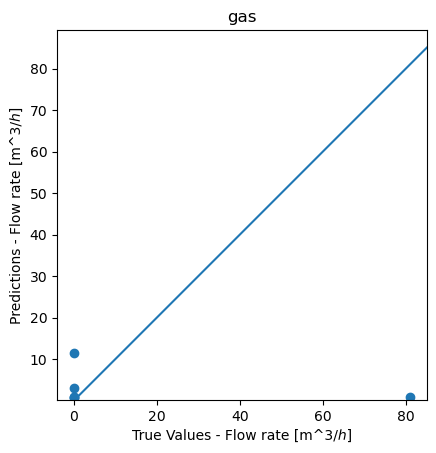

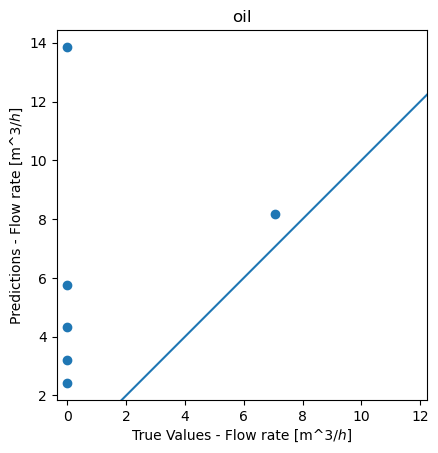

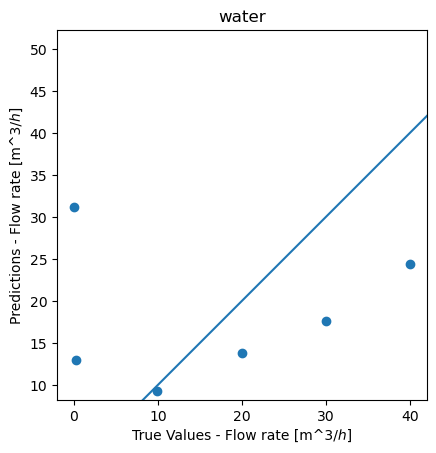

In [62]:
# Run predict
Y_pred = model.predict(final_test_X)
gas_pred = Y_pred[0]
oil_pred = Y_pred[1]
water_pred = Y_pred[2]
plot_diff(final_test_Y[0], Y_pred[0], title='gas')
plot_diff(final_test_Y[1], Y_pred[1], title='oil')
plot_diff(final_test_Y[2], Y_pred[2], title='water')

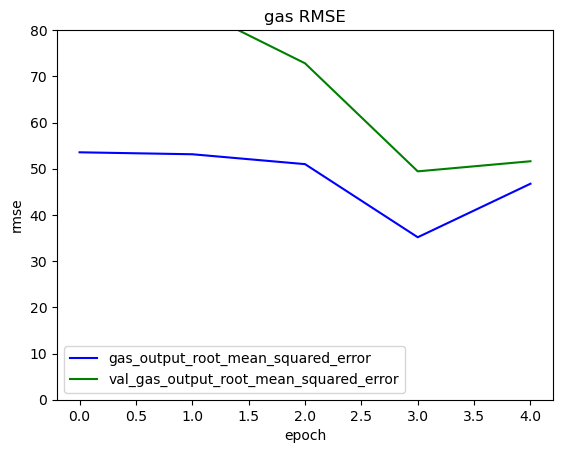

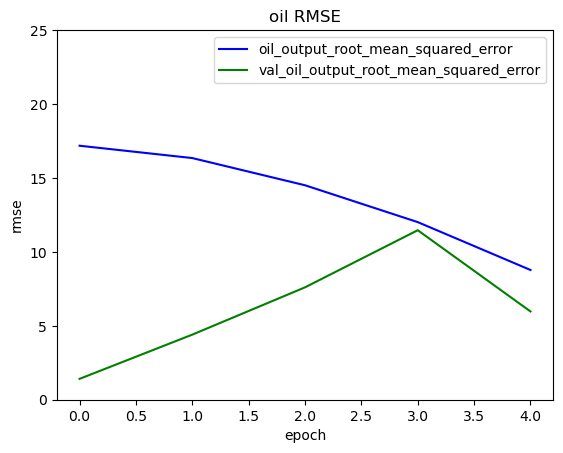

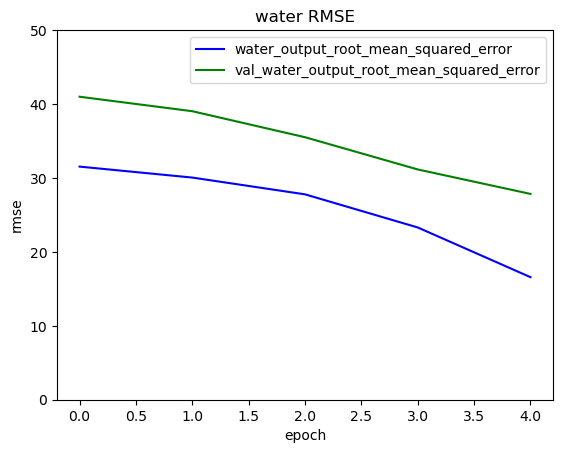

In [63]:
# Plot RMSE
plot_metrics(metric_name='gas_output_root_mean_squared_error', title='gas RMSE', ylim=80)
plot_metrics(metric_name='oil_output_root_mean_squared_error', title='oil RMSE', ylim=25)
plot_metrics(metric_name='water_output_root_mean_squared_error', title='water RMSE', ylim=50)

In [68]:
Y_pred = np.squeeze(Y_pred)

In [70]:
#Create a DataFrame of different parameters
import pandas as pd
pred_df = pd.DataFrame({
                        "gas_true": final_test_Y[0],
                        "gas_preds": Y_pred[0],
                        "oil_true": final_test_Y[1],
                        "oil_preds": Y_pred[1],
                        "water_true": final_test_Y[2],
                        "water_preds": Y_pred[2]})
pred_df

,gas_true,gas_preds,oil_true,oil_preds,water_true,water_preds
0,0.000000,0.764627,0.000000,3.196352,20.000847,13.837369
1,0.000000,2.979407,0.000000,13.857859,9.905158,9.334458
2,0.000000,0.744291,0.000000,2.426420,39.990620,24.337421
3,80.954721,0.802189,0.000000,5.757351,0.000000,31.171856
4,0.000000,11.385274,7.064082,8.179276,0.208328,12.922804
5,0.000000,0.787508,0.000000,4.334383,30.000742,17.661474


In [72]:
# Test the model and print loss and rmse
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = model.evaluate(x=final_test_X, y=final_test_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

1/1 [==============================] - 0s 24ms/step - loss: 1399.1578 - gas_output_loss: 1094.1146 - oil_output_loss: 43.5537 - water_output_loss: 261.4895 - gas_output_root_mean_squared_error: 33.0774 - oil_output_root_mean_squared_error: 6.5995 - water_output_root_mean_squared_error: 16.1706

loss: 1399.1578369140625
gas_loss: 1094.1146240234375
oil_loss: 43.553680419921875
water_loss: 261.4894714355469
gas_rmse: 33.0774040222168
oil_rmse: 6.599521160125732
water_rmse: 16.170635223388672


In [73]:
# Save model
model.save('./model_flow_rate_final_single_phase/', save_format='tf')

INFO:tensorflow:Assets written to: ./model_flow_rate_final_single_phase/assets


INFO:tensorflow:Assets written to: ./model_flow_rate_final_single_phase/assets


In [76]:
# # Restore model
loaded_model = tf.keras.models.load_model('./model_flow_rate_final_single_phase/')

In [77]:
# Run predict with restored model
predictions = loaded_model.predict(norm_test_X)
gas_pred = predictions[0]
oil_pred = predictions[1]
water_pred = predictions[2]

1/1 [==============================] - 0s 92ms/step


In [74]:
pred_df.to_csv('predictions_and_true_single_phase_final.csv', index=True)

In [78]:
# Test the model and print loss and rmse
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = loaded_model.evaluate(x=final_test_X, y=final_test_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

1/1 [==============================] - 0s 194ms/step - loss: 1399.1578 - gas_output_loss: 1094.1146 - oil_output_loss: 43.5537 - water_output_loss: 261.4895 - gas_output_root_mean_squared_error: 33.0774 - oil_output_root_mean_squared_error: 6.5995 - water_output_root_mean_squared_error: 16.1706

loss: 1399.1578369140625
gas_loss: 1094.1146240234375
oil_loss: 43.553680419921875
water_loss: 261.4894714355469
gas_rmse: 33.0774040222168
oil_rmse: 6.599521160125732
water_rmse: 16.170635223388672
